In [177]:
from __future__ import print_function
import mlbgame

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

# Allie Surina
## Capstone Project: Predicting Injuries from MLB Game & Disabled List Data

## Project Goal: To find and analyze game log data for MLB games from 2000 - 2016, along with whether a player was placed on the Disabled List after a particular game (i.e. he was injured during his previous game), and predict:
- ## (a) whether an injury will happen in a game.
- ## (b) whether a player will be injured in the next game.

## Data:
* **GAMELOG Data**
 * Originally, I started using the `mlbgame` API, which directly accesses MLB.com. However, on Tuesday, Nov 13, I realized that the game information I was pulling from the API was not a full log of all the games for my years of interest. 
 * I decided to use Retrosheet's game logs (http://www.retrosheet.org/). Retrosheet contains game logs of increasing complexity for games from years 1871 - 2016, in .txt files with no heders, and Retrosheet provides a data dictionary that describes the 160 columns for each game log (data dict: http://www.retrosheet.org/gamelogs/glfields.txt )
 
* **INJURY Data** (See injury_data_scrape.ipynb Jupyter Notebook)
 * I was able to scrape Disabled List data from 723 pages of search results from Pro_sports_transactions (http://www.prosportstransactions.com/). There were 18066 rows including players being placed on the list as well as those players being reactivated. The datas had five columns for:
  - Date
  - Team
  - Acquired Player name
  - Relinquished Player name
  - Notes: (e.g. placed on 15-day DL with hip injury)
 * I added a binary column based on whether the notes had "placed" ==1 or "reactivated", and deleted all rows where players where being brought off the DL, since I want to use the data only. The remaining number of rows is 8346.
 * I added a column `'DL_length'` that holds the length of time the injured player was on the DL list, and coded unknown cells with `0`. The 
 * I added a column `'Injury_Type'` where the type of injury was contained in teh `'Notes'` column after the word 'with'. The injury type was not reported in most cases, and those that didn't have a 'with' word were coded with `'Unknown'`. 
 * The final number of columns was 8. I saved the dataframe to a CSV file named 'injuries.csv', which is in the main folder of the repository, and which I use to bring the data into the main Notebook.

## Methods:
* I plan to use machine learning and classification to predict whether an injury will happen in a game, and to predict whether a player will be injured in the next game. 
* I will analyze two dataframes:
 * The first dataframe will contain game data with each row referencing a different game over time.
 * The second dataframe and analysis will be more of a data challenge. It will contain information about each player in each game, with player_game as individual rows and will be used to predict whether a player will be injured in the next game. The considerations for this analysis are whether or not I can handle the number of rows that would be required to analyze this data. Each year, each player has 162 regular season games. All teams are allowed up to 40 players on their roster, which doesn't include players on the 60-day disabled list. There are 30 teams, so at a minimum, this analysis is (30 teams x 40 players * 162 regular season games per year = 194400 rows for one year of games.

## Status:
* I have done some EDA on the injury data and found that teams have different counts of injuries over times. The range of total number of injuries per team is (50, 350) which could help in classification.
* The length of time on the Disabled List (severity of injury) varies by team, within a certain range. This could also be helpful in predicting whether a game will have an injury based on which teams are playing the game.

## Next Steps:

* I am working on capturing the game log information still. The most time intensive tasked started on November 15, which is adding the 160 column heading manually to a list to use as df.columns for the 17 years of game log data I will upload.

# Game Log Data
## Status: Currently Working:
### Getting Game Logs from Retrosheet.com

The information used here was obtained free of
     charge from and is copyrighted by Retrosheet.  Interested
     parties may contact Retrosheet at "www.retrosheet.org".

In [334]:
files = ['GL2000.TXT', 'GL2001.TXT', 'GL2002.TXT', 'GL2003.TXT', 'GL2004.TXT', 'GL2005.TXT','GL2000.TXT',
        'GL2006.TXT','GL2007.TXT','GL2008.TXT','GL2009.TXT','GL2010.TXT','GL2011.TXT',
        'GL2012.TXT','GL2013.TXT','GL2014.TXT','GL2015.TXT','GL2016.TXT']
# Let's bring in one file and see what the outcome is:
year = 2000
for filey in files:
    temp_game_+str(year) = pd.read_csv(filey, header=None)
    temp_game_+str(year).columns = [
        'date','num_game','day','v_team','v_league','v_team_game_num',
        'h_team', 'h_league','h_team_game_num','v_team_score','h_team_score','game_length_outs',
        'day_night','when_complete','forfeit','protest','park_id', 'attendance',
        'time_game_min', 'v_line_scores','h_line_scores','v_at_bats','v_hits','v_doubles',
        'v_triples','v_homeruns','v_RBI','v_sac_hits', 'v_sac_files','v_hit_pitch',
        'v_walks', 'v_int_walks', 'v_strikeouts', 'v_stol_base', 'v_caught_steal', 'v_grnd_dbl_plays', 
        'v_awd_fst_catch_intf', 'v_left_on_base','v_pitchers','v_ind_earn_runs','v_team_earn_runs','v_wild_pitch',
        'v_balks','v_putouts','v_assists','v_errors','v_pass_balls','v_dbl_plays',
        'v_trp_plays','h_at_bats','h_hits','h_doubles', 'h_triples','h_homeruns',
        'h_RBI','h_sac_hits', 'h_sac_files','h_hit_pitch','h_walks', 'h_int_walks', 
        'h_strikeouts', 'h_stol_base', 'h_caught_steal','h_grnd_dbl_plays', 'h_awd_fst_catch_intf','h_left_on_base',
        12'h_pitchers','h_ind_earn_runs','h_team_earn_runs','h_wild_pitch','h_balks','h_putouts',
        'h_assists','h_errors','h_pass_balls','h_dbl_plays','h_trp_plays','h_plate_ump_id',
        'h_plate_ump_name','first_b_ump_id','first_b_ump_name','sec_b_ump_id','sec_b_ump_name','third_b_ump_id',
       (85) 'third_b_ump_name', 'lf_ump_id','lf_ump_name','rf_ump_id','rf_ump_name','v_mgr_id',
        'v_mgr_name','h_mgr_id','h_mgr_name','w_pitch_id','w_pitch"name','l_pitch_id',
        'l_pitch_name','sv_pitch_id','sv_pitch_name','game_win_rbi_bat_id','game_win_rbi_bat_name','v_start_pitch_id',
        'v_start_pitch_name', 'h_start_pitch_id', 'h_start_pitch_name', 'v_pl_1_id','v_pl_1_name', 'v_pl_1_pos',
        'v_pl_2_id','v_pl_2_name', 'v_pl_2_pos','v_pl_3_id','v_pl_3_name', 'v_pl_3_pos',
        'v_pl_4_id','v_pl_4_name', 'v_pl_4_pos','v_pl_5_id','v_pl_5_name', 'v_pl_5_pos',
        'v_pl_6_id','v_pl_6_name', 'v_pl_6_pos','v_pl_7_id','v_pl_7_name', 'v_pl_7_pos',
        'v_pl_8_id','v_pl_8_name', 'v_pl_8_pos','v_pl_9_id','v_pl_9_name', 'v_pl_9_pos',
        'h_pl_1_id','h_pl_1_name', 'h_pl_1_pos','h_pl_2_id','h_pl_2_name', 'h_pl_2_pos',
        'h_pl_3_id','h_pl_3_name', 'h_pl_3_pos','h_pl_4_id','h_pl_4_name', 'h_pl_4_pos',
        'h_pl_5_id','h_pl_5_name', 'h_pl_5_pos','h_pl_6_id','h_pl_6_name', 'h_pl_6_pos',
        'h_pl_7_id','h_pl_7_name', 'h_pl_7_pos','h_pl_8_id','h_pl_8_name', 'h_pl_8_pos',
        (157)'h_pl_9_id','h_pl_9_name', 'h_pl_9_pos',
        
        
        
    
temp_game_data = pd.read_csv('GL2000.TXT', header=None)
temp_game_data.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,20000329,0,Wed,CHN,NL,1,NYN,NL,1,5,...,Todd Zeile,3,ordor001,Rey Ordonez,6,hampm001,Mike Hampton,1,NaN,Y
1,20000330,0,Thu,NYN,NL,2,CHN,NL,2,5,...,Jeff Huson,6,giraj001,Joe Girardi,2,farnk001,Kyle Farnsworth,1,NaN,Y
2,20000403,0,Mon,COL,NL,1,ATL,NL,1,0,...,Eddie Perez,2,weisw001,Walt Weiss,6,maddg002,Greg Maddux,1,NaN,Y
3,20000403,0,Mon,MIL,NL,1,CIN,NL,1,3,...,Aaron Boone,5,tuckm001,Michael Tucker,7,harnp001,Pete Harnisch,1,NaN,Y
4,20000403,0,Mon,SFN,NL,1,FLO,NL,1,4,...,Brant Brown,9,redmm001,Mike Redmond,2,ferna001,Alex Fernandez,1,NaN,Y


# Injury Data
## Status: Complete
### Import Injuries List for 1999 - 2016 from created file 'injuries.csv'

In [174]:
file = 'injuries.csv'
injury_df = pd.read_csv(file)

In [181]:
injury_df.head()

,Date,Team,Acquired,Relinquished,Notes,Injury,DL_length,Injury_Type
0,1999-04-05,Cardinals,,• David Howard,placed on 15 day DL,1,15,unknown
1,1999-04-05,Cardinals,,• Ray Lankford,placed on 15 day DL,1,15,unknown
2,1999-04-05,Giants,,• Bill Mueller,placed on 15 day DL,1,15,unknown
3,1999-04-08,Padres,,• George Arias,placed on 15 day DL,1,15,unknown
4,1999-04-12,Indians,,• Ricardo Rincon,placed on 15 day DL,1,15,unknown


# EDA on Injuries

### Plot the amount of time spent on the diabled list:
* The historical miniminum amount of time a player was on the DL was 15 days, until this last decade, when minor injuries were added with 7- and 10- day placements. The majority of placements, therefore, are 15-day: 6,904 DL placements in all.

In [176]:
injury_df.DL_length.value_counts()

15    6904
10     640
60     587
0      110
7      105
Name: DL_length, dtype: int64

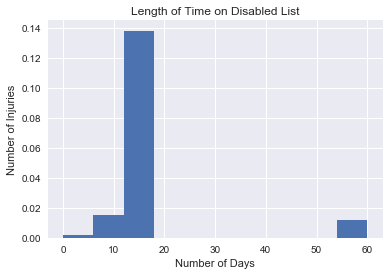

In [345]:
plt.hist(injury_df.DL_length, normed=True)
plt.title('Length of Time on Disabled List')
plt.xlabel('Number of Days')
plt.ylabel('Number of Injuries')

## Which Team Has the Most Severe Injuries?? 
### Plot DL-length by Team
* Most of the teams have mean DL-length between 15 and 20, but the Expos and the Devil Rays had greater variance.

/Users/freedom/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


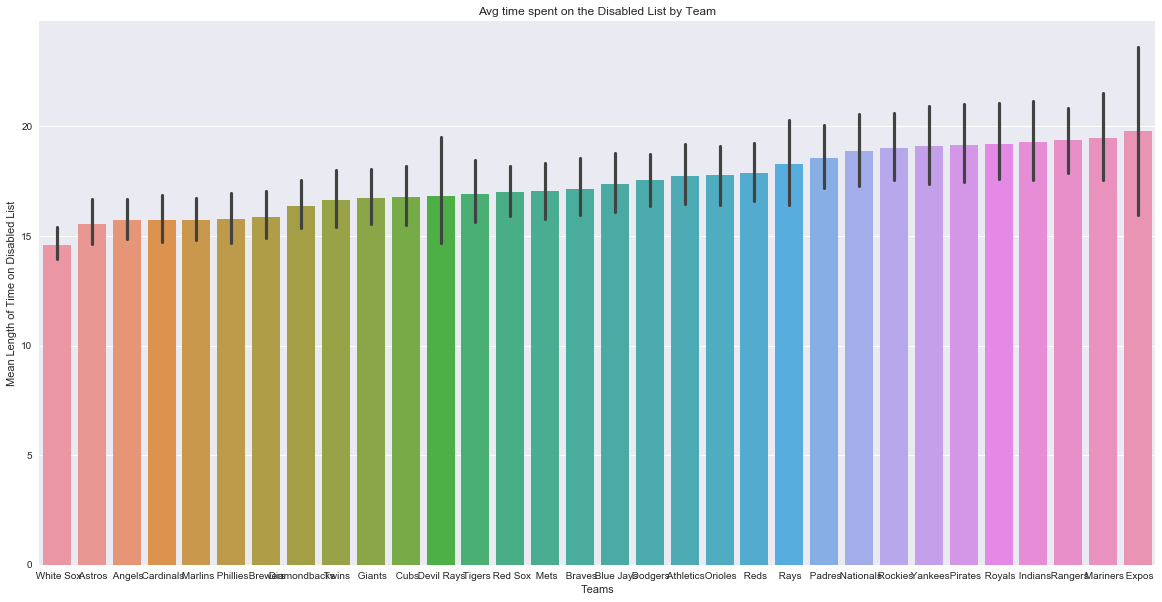

In [349]:
# To sort the barplot by mean length of time on DL
result = injury_df.groupby(["Team"])['DL_length'].aggregate(np.mean).reset_index().sort_values('DL_length')

plt.figure(figsize=(20,10))
sns.barplot(injury_df.Team, injury_df.DL_length, order=result['Team'])
plt.title('Avg time spent on the Disabled List by Team')
plt.xlabel('Teams')
plt.ylabel('Mean Length of Time on Disabled List')

## Plot the Histogram of Team Injuries Count to See if Some Teams Have More Injuries Than Others:
* First, let's make a count of the total number of injuries for each team.
* Then plot a histogram of those counts to see the most common injury counts, as well as the outliers (e.g. onen team has only 50 injuries - two teams have over 350 injuries.

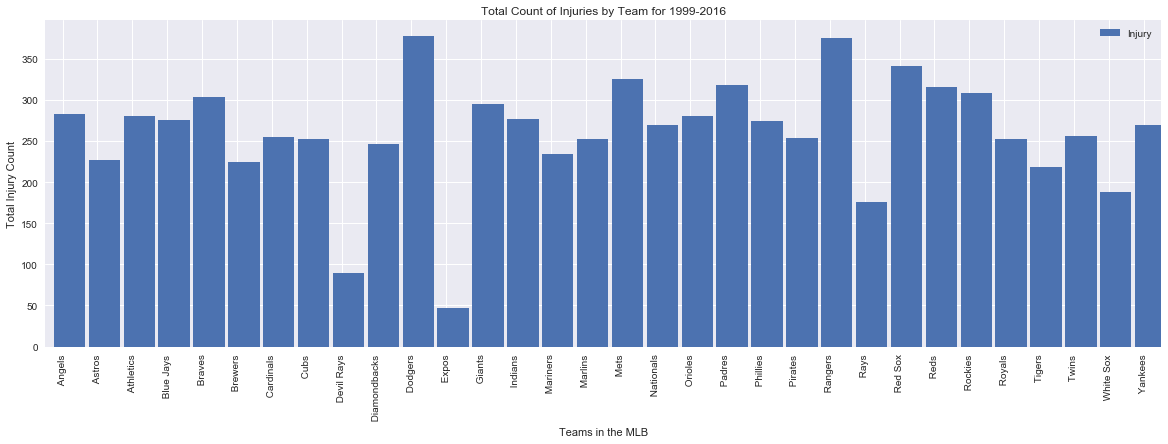

In [397]:
team_count_injury = pd.DataFrame(injury_df.groupby('Team')['Injury'].sum())
ax = team_count_injury.plot(kind='bar',figsize=(20,6))
for container in ax.containers:
              plt.setp(container, width=0.9)
plt.title('Total Count of Injuries by Team for 1999-2016')
plt.xlabel('Teams in the MLB')
plt.ylabel('Total Injury Count')


## Before I deleted the mlbgame code, I had used it to grab the team specific information:
* team names, divisions, leagues, club id, timezones and home locations.
* I created a dataframe called `teams_df` with it.
* I saved it as a CSV called `'injury_with_team_id.csv'`

In [248]:
# Grabbing team info from mlbgame class Info to create a dictionary:
# team_info = []
# for thing in mlbgame.teams():
#     team_info_dict = {}
#     team_info_dict['team_id'] = thing.team_id
#     team_info_dict['team_full_name'] = thing.club_full_name
#     team_info_dict['division'] = thing.division
#     team_info_dict['league'] = thing.league
#     team_info_dict['club_id'] = thing.club_id
#     team_info_dict['hist_team_code'] = thing.historical_team_code
#     team_info_dict['twitter'] = thing.twitter
#     team_info_dict['timezone'] = thing.timezone
#     team_info_dict['home_location'] = thing.city
#     team_info.append(team_info_dict)
# teams_df = pd.DataFrame(team_info)

In [249]:
teams_df.head()

,club_id,division,hist_team_code,home_location,league,team_full_name,team_id,timezone,twitter
0,3,West,ARI,Phoenix,National,Arizona Diamondbacks,109,MST,Dbacks
1,4,East,BS1,Atlanta,National,Atlanta Braves,144,ET,Braves
2,5,East,MLA,Baltimore,American,Baltimore Orioles,110,ET,Orioles
3,6,East,BOS,Boston,American,Boston Red Sox,111,ET,redsox
4,7,Central,CH2,Chicago,National,Chicago Cubs,112,CT,Cubs


In [255]:
# def map_team_id(team, dictdf):
#     """Function maps the team_id back to the injury df"""
#     return
        

In [254]:
# For the injury dataset, I want to add the team_id but the injury_df 'Team'
# column is a shortened version of teams_df.team_full_name, so I'll have to do some
# snaggling.
# injury_df['team_id'] = pd.Series()
# for idx, i in enumerate(injury_df.Team):
#     print(idx)
#     for jdx, j in enumerate(teams_df.team_full_name):
#         if i in j:
#             injury_df['team_id'][idx] = teams_df['team_full_name'][jdx]


0


/Users/freedom/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/freedom/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340


6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979


In [257]:
# Once I've done this horribly time-intensive process, let's create a CSV.
# injury_df.to_csv('injury_with_team_id')